<a href="https://www.inove.com.ar"><img src="https://lh3.googleusercontent.com/pw/ACtC-3ekLfw0AsoodcZkIONBznVKnsM7SsYW-qx66kYaiTAsZ5TZ0_lNLxuRqJWiuuL6j0UwjKa_ArO89y74bcX0GARWYhJMA04Soox_OYmNOohb9_NE2zwAYK7KMOtAj8tDowysed7ergBwBThxGU2epAm8=w1366-h239-no?authuser=0" width="1000" align="center"></a>
<h1>⏵Predecir el diagnóstico de un paciente por sus dolencias⏴</h1>
<h4>Sobre este ejemplo</h4>
En este notebook se ejemplifica como crear un clasificador que indique que tipo de dolencia o diagnóstico posee un paciente basado en la descripción de su problema utilizando Machine Learning.

Información importante:
* [LINK](https://github.com/sempwn/medical-text-nlp/blob/master/nbs/tutorial.ipynb) del trabajo realizado por Mike Irvine. 

* [LINK](https://www.kaggle.com/paultimothymooney/medical-speech-transcription-and-intent) del dataset completo en Kaggle.


# Recolectar datos

<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3dp4dMGFr2D00UyD0240fBNyrzptD5onOf1wkHioTvEo-RpDmNEP61ssGPS4IiSKtDEwUHaU8krqeFZi3mjkiQDE72dtJy9zxptu48TYzfnbQp-O1WFZ0LFaXDG-jIz01IQyw2fZJzEFhnk_zK-glgP=w1366-h133-no?authuser=0" width="1000" align="middle"></div>



En esta etapa inicial se cargará datos respecto a la descripción médica de los síntomas de distintos pacientes y su diagnostico final.

In [ ]:
# Cargar datos
df = pd.read_csv('../data/overview-of-recordings.csv')

In [ ]:
# Imprimir la cantidad de casos para analizar
print(len(df.index))

6661


In [ ]:
# return 10 random rows from dataframe
df.sample(n=10)[['phrase','prompt']]

,phrase,prompt
4025,My foot hurts me a lot of playing football,Foot ache
5962,Hearing any loud sounds makes my ear aches,Ear ache
3300,I have a break in the skin between my thumb and index finger and it will not close.,Open wound
5750,I feel like there is something swollen and inflamed at the back of my knee.,Knee pain
3813,I'm not hearing well I have problem with my ear,Ear ache
2781,I cut my hand a couple of days ago and although I didn't think I needed it stitches it hasn't closed up.,Open wound
6626,I have a throbbing in my joints,Joint pain
1755,My knee is hurting so badly.,Joint pain
2887,I have a cut that is red and swollen.,Infected wound
1671,stiffness inability to look right or left except by moving the whole body,Neck pain


# Procesar datos

<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3ecH_bbd3CY23v8dqfIsuoE1FT7dDeRqxlG4Ti4RzKkOqAHMTD8ukvX7wx_G2PkKFQjNeoGGtL3xoqhCqfKCSdk1lE_2FuTiQaV2jDy3_fZeVbBxgEhtVwGnoLhBfQyb36KZxHPn0puUpJV825MBkQJ=w1366-h133-no?authuser=0" width="1000" align="middle"></div>

### Eliminar duplicados

In [ ]:
df.drop_duplicates(subset='phrase',inplace=True)
df = df.reset_index()

# Explorar datos

<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3ePJ3-PFgVLwddhdqRi7z7VRo8j3r6LBSRPzWNek5805rJeEdWJKIbAKGj133aGArHgu1oe8-IDj9ET8FtAW0R5GrUOcPzgG0nnUFhfIRyug0VQ_2DwNB_zmMuReBy60ExzOQprBc8us4HlthdvRtx6=w1366-h133-no?authuser=0" width="1000" align="middle"></div>

## Contar cuantos registros hay por diagnóstico

In [ ]:
counts = df['prompt'].value_counts()

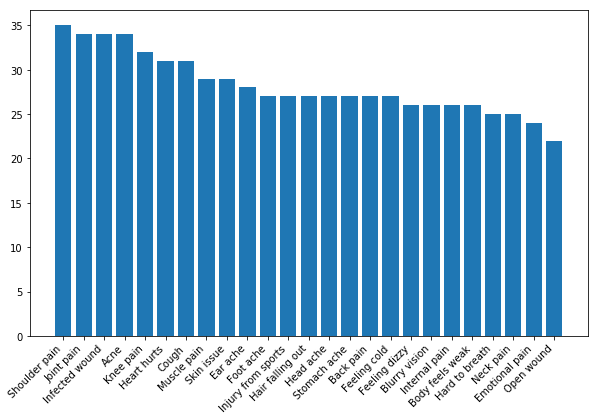

In [ ]:
plt.figure(figsize=(10,6));
plt.bar(counts.index,counts.values);
plt.xticks(rotation=45,ha='right');

In [ ]:
print('# of classes: {}'.format(len(classes)))
print('Fitted classes:')
print(classes)

Fitted classes:\
['Acne' 'Back pain' 'Blurry vision' 'Body feels weak' 'Cough' 'Ear ache'
 'Emotional pain' 'Feeling cold' 'Feeling dizzy' 'Foot ache'
 'Hair falling out' 'Hard to breath' 'Head ache' 'Heart hurts'
 'Infected wound' 'Injury from sports' 'Internal pain' 'Joint pain'
 'Knee pain' 'Muscle pain' 'Neck pain' 'Open wound' 'Shoulder pain'
 'Skin issue' 'Stomach ache']

### Encontrar las palabras más utilizadas (nube de palabras)

In [ ]:
from wordcloud import WordCloud

In [ ]:
# Generate a word cloud image
text = ' '.join(df['phrase'].values)
word_cloud = WordCloud(width=600,height=400,
                       max_words=150, background_color="white",
                       collocations=False).generate(text)

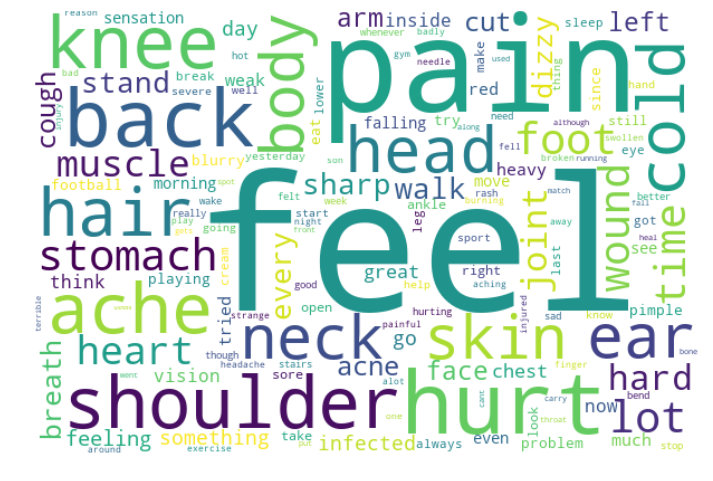

In [ ]:
plt.figure(figsize=(12,10));
plt.imshow(word_cloud, interpolation='bilinear');
plt.axis('off');

# Entrenar modelo

<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3csSQnxbKYYltM7w3bryOXpVvhrxI8PZ-xHKtEleb8SiwPjx_vNiCIfYQUVVUtCUz5zyhyCGqCjj9mWlHcXqmSZpHL5lrQrCcnbg0tRQiWYmATPeAzVKVrQGCA22rH7R9QrQsOFjeXmw3z4a17k_GTn=w1366-h133-no?authuser=0" width="1000" align="middle"></div>

### Crear datos para entrenamiento (train) y validacion (test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.10, stratify=target,random_state=42)
print('Training data size: {}'.format(len(X_train)))
print('Testing data size: {}'.format(len(X_test)))

Training data size: 635
Testing data size: 71


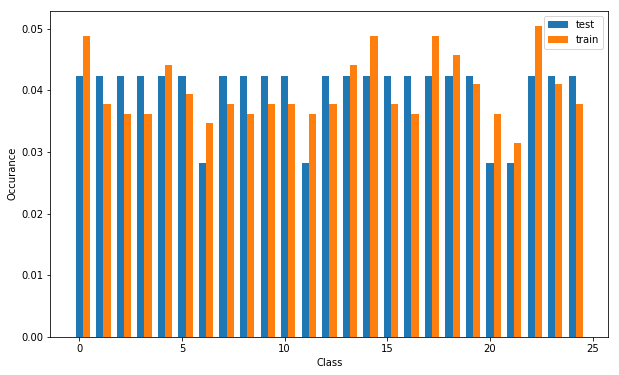

In [ ]:
plot_comparison_classes(y_test,y_train)

### Clasificador Random forest

![https://cdn-images-1.medium.com/max/1600/1*i0o8mjFfCn-uD79-F1Cqkw.png](https://cdn-images-1.medium.com/max/1600/1*i0o8mjFfCn-uD79-F1Cqkw.png)

El algoritmo Random Forest es un tipo de algoritmos de aprendizaje supervisado de Machine Learning principalmente usados en problemas de clasificación.

![https://cdn-images-1.medium.com/max/1600/1*i0o8mjFfCn-uD79-F1Cqkw.png](https://i0.wp.com/www.samtalksml.net/wp-content/uploads/2017/05/image_dt1-1.png?resize=768%2C628&ssl=0.5)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
text_rf_clf = Pipeline([
    ('vect', CountVectorizer(tokenizer=LemmaTokenizer())),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=1000)),
])


In [ ]:
text_rf_clf.fit(X_train, y_train) 


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

# Validar modelo

<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3cak4pQwIT8LrDUfrv0XXdf9MfEDbCytI3Yttzzd8BG0AyqJ74FpFe5kVMZ0UoKguSjr3-_qKe1Qg2eWEk5YalKmtcwGFV5OS2CmmoVsEPIRpUZeg4SzIDrcQDRTGNP-9RPT4q1VVXrHtCdCZDYrfgW=w1366-h133-no?authuser=0" width="1000" align="middle"></div>

In [ ]:
print('Training data')
predicted = text_rf_clf.predict(X_train)
print_resampled_accuracy(predicted,y_train,samples=1000)

Training data
Accuracy : 99.84% (99.53% - 100.00%)


In [ ]:
print('Test data')
predicted = text_rf_clf.predict(X_test)
print_resampled_accuracy(predicted,y_test,samples=1000)

Test data
Accuracy : 83.10% (73.24% - 91.55%)


### Evaluar modelo por clase o categoría

Uno de los indicadores más utilizados para evaluar modelos en inteligencia artifical son: precision, recall y f1-score.

![img](https://cdn-images-1.medium.com/max/1600/1*pOtBHai4jFd-ujaNXPilRg.png)

![img2](https://cdn-images-1.medium.com/max/1600/1*DIhRgfwTcxnXJuKr2_cRvA.png)

- La precisión es qué porcentaje de predicciones positivos fueron correctas.
- La recuperación (recall) es qué porcentaje de casos positivos fueron capturados.
- La exactitud (accuracy) es que porcentaje de predicciones fue correcta

El valor F1 se utiliza para combinar las dos medidas “precisión” y “recuperación” en un solo valor, es la media armónica entre ambos (supone que nos importa de igual manera la precisión y la recuperación).

- F1-score vale “1” cuando el clasificador es perfecto
- F1-score vale “0” cuando el clasificador predijo todo de forma incorrecta.


In [ ]:
print(classification_report(y_test, predicted, target_names=classes))

                    precision    recall  f1-score   support

              Acne       1.00      1.00      1.00         3
         Back pain       1.00      1.00      1.00         3
     Blurry vision       1.00      0.67      0.80         3
   Body feels weak       0.60      1.00      0.75         3
             Cough       0.67      0.67      0.67         3
          Ear ache       1.00      1.00      1.00         3
    Emotional pain       1.00      1.00      1.00         2
      Feeling cold       1.00      1.00      1.00         3
     Feeling dizzy       1.00      1.00      1.00         3
         Foot ache       1.00      1.00      1.00         3
  Hair falling out       0.75      1.00      0.86         3
    Hard to breath       0.00      0.00      0.00         2
         Head ache       0.75      1.00      0.86         3
       Heart hurts       1.00      1.00      1.00         3
    Infected wound       1.00      1.00      1.00         3
Injury from sports       0.50      0.33

# Utilizar el modelo (realizar predicciones)

<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3cCImYtu1CcKuITmTpV7hyJmrEt_8ADIqZiqlksAyNwCvcwR8sDZLQl54gmo4sobCgb3vpuzjWAFDkBh6cT33oBYTMJMyltD25Q8einZ37Gx_9gsCLI50iBX1wo3fz5c0BaedWiyJs3MdHotbxnkSjg=w1366-h133-no?authuser=0" width="1000" align="middle"
></div>

### Ver predicciones acertadas

In [ ]:
row = df.sample()
example_sentence = row['phrase'].values[0]
condition = row['prompt'].values[0]

is my cut infected or just healing?
True condition: Infected wound


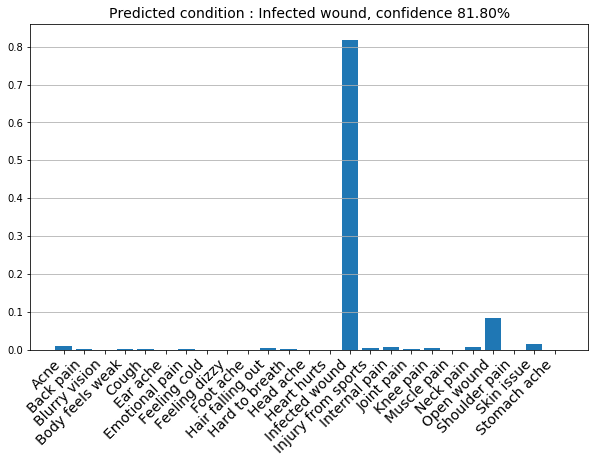

In [ ]:

print(example_sentence)
print('True condition: {}'.format(condition))
print_class_prediction(example_sentence,clf=text_rf_clf)

### Ver predicciones NO acertadas

Sentence: 
When I wake up in the morning I feel a soreness in my body
True label: ['Muscle pain']


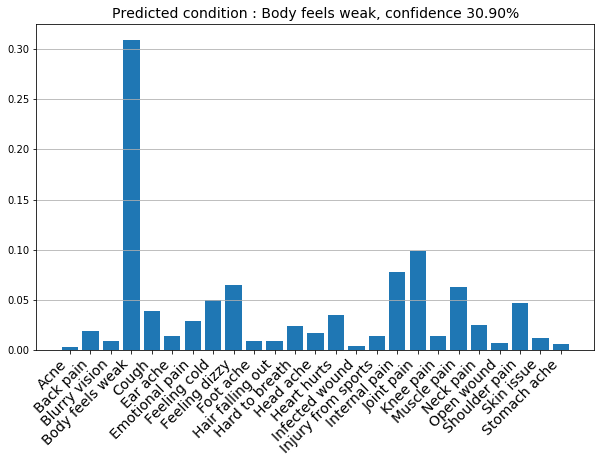

In [ ]:
# get random incorrectly labelled sentence
incorrect_X = X_test[predicted != y_test]
incorrect_y = y_test[predicted != y_test]

ind = np.random.randint(0,len(incorrect_y))

incorrrectly_labeled_sentence = incorrect_X[ind]
true_class = le.inverse_transform([incorrect_y[ind]])

print('Sentence: ')
print(incorrrectly_labeled_sentence)

print('True label: {}'.format(true_class))
print_class_prediction(incorrrectly_labeled_sentence,clf=text_rf_clf)

<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3c0b9wdQXhFVvYu-h9-AsPEg621I8En-CINRW5eJhYJweohC0gQ-8j-ZftxoZ6TXZWQbFRoLxNCH_xLHjnEEUMMKg9k72CQU8Zyd2if6CFBPWV_8umCQXI543v6o1cOhk5001p-pKe8wIOb2eSa2KN7=w1366-h133-no?authuser=0" width="1000" align="middle"></div>